<a href="https://colab.research.google.com/github/edypj/DataPrediction/blob/main/Redwine_Quality_Raandom_Forest_and_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/dataset


/content/drive/MyDrive/dataset


In [4]:
df_wine = pd.read_csv('winequality-red.csv')

In [5]:
display(df_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
# view summary of dataset

df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
# Deskripsi statistik
description = df_wine.describe()
print(description)

print("--------------------------------------------------------------------")

# Korelasi
correlation = df_wine.corr()
print(correlation)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [13]:
# Menghitung korelasi antara fitur-fitur dan variabel target
correlation = df_wine.corr()['quality'].abs().sort_values(ascending=False)

# Menampilkan 5 fitur dengan korelasi tertinggi
print(correlation.head(6))  # Tampilkan 6 karena termasuk variabel target juga

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
Name: quality, dtype: float64


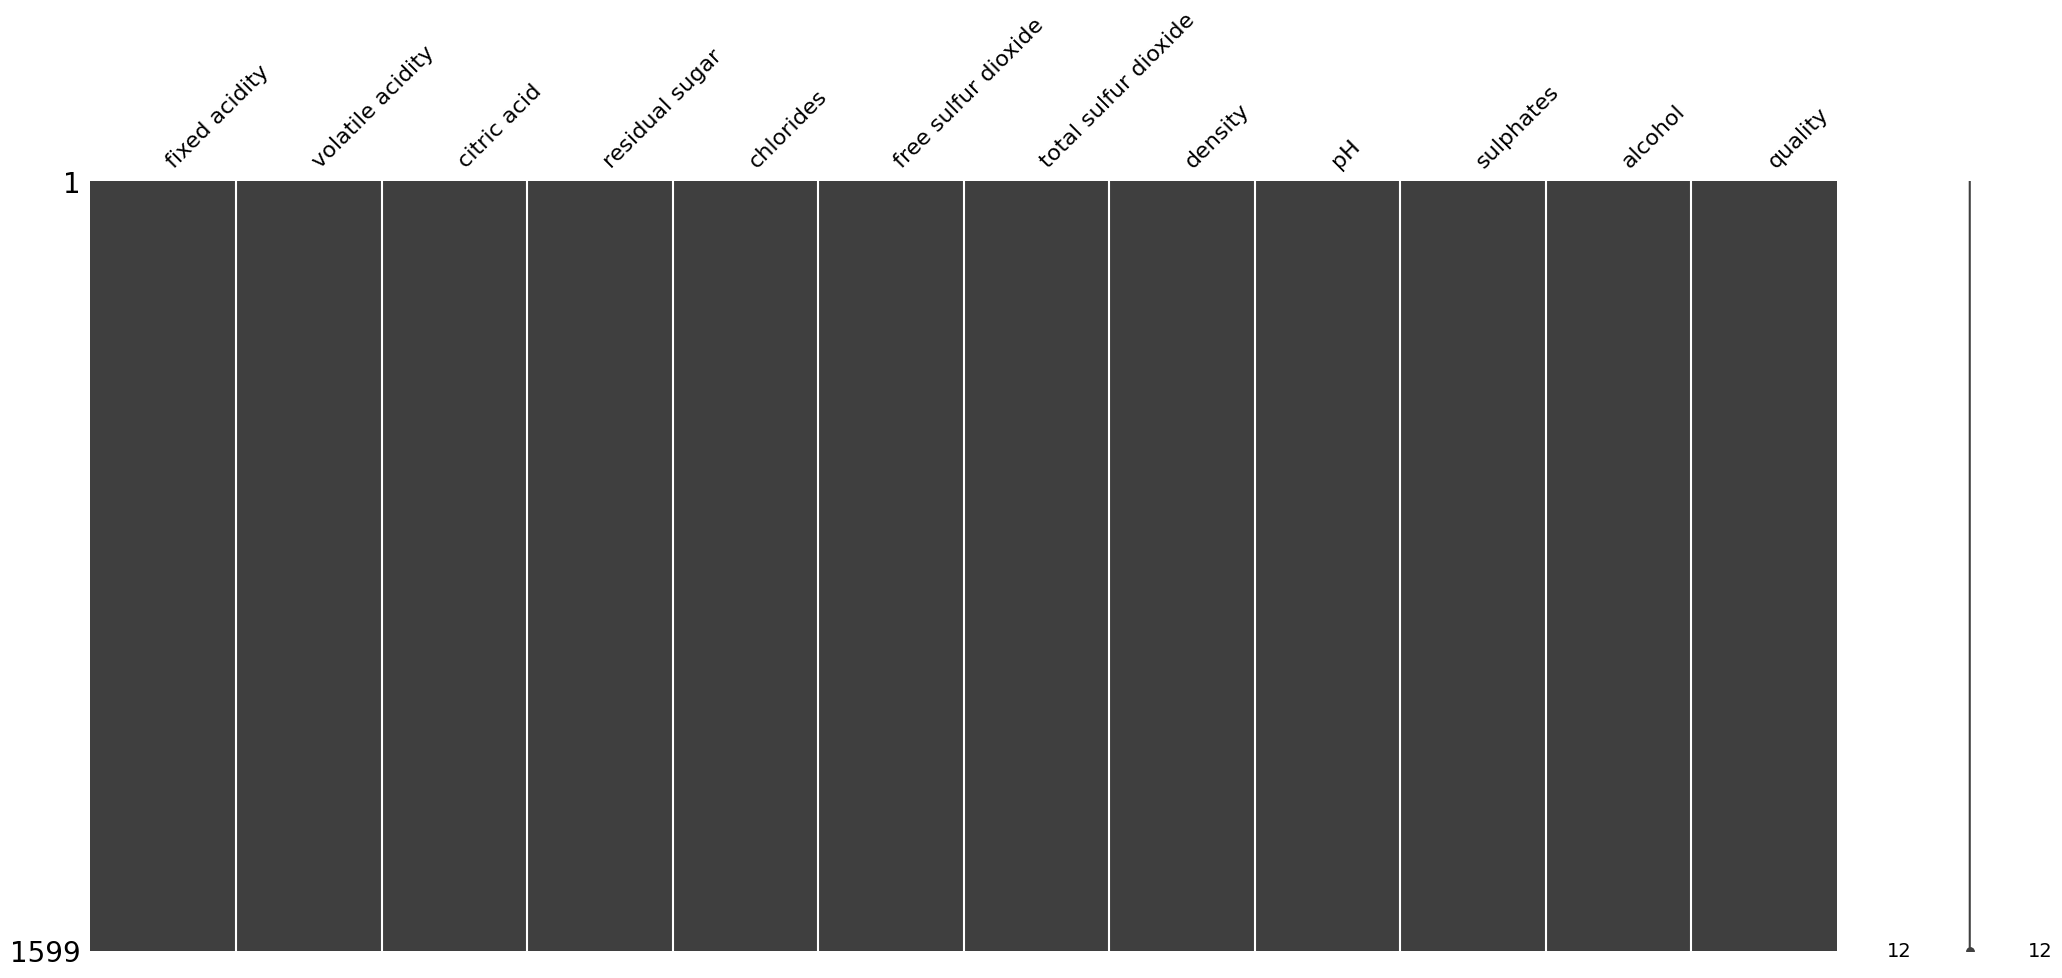

In [16]:
import matplotlib.pyplot as plt
import missingno as msno
# Visualisasi matriks nilai yang hilang
msno.matrix(df_wine)
plt.show()


In [17]:
# Memisahkan fitur (X) dan target (y)
X = df_wine.drop('quality', axis=1)  # Semua kolom kecuali 'quality' adalah fitur
y = df_wine['quality']  # Variabel target

# Membagi dataset menjadi data pelatihan dan data pengujian (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data pelatihan dan pengujian
print("Ukuran data pelatihan (X_train):", X_train.shape)
print("Ukuran data pengujian (X_test):", X_test.shape)
print("Ukuran label pelatihan (y_train):", y_train.shape)
print("Ukuran label pengujian (y_test):", y_test.shape)

Ukuran data pelatihan (X_train): (1279, 11)
Ukuran data pengujian (X_test): (320, 11)
Ukuran label pelatihan (y_train): (1279,)
Ukuran label pengujian (y_test): (320,)


In [24]:
# Membuat dan melatih model RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data pengujian
y_pred = rf_model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Random Forest:", accuracy)

Akurasi model Random Forest: 0.659375


In [27]:
# Melakukan prediksi menggunakan data pengujian
y_pred_rf = rf_model.predict(X_test)

# Membuat laporan klasifikasi
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi Random Forest:")
print(classification_rep_rf)

Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Membuat dan melatih model Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data pengujian
y_pred_gnb = gnb_model.predict(X_test)

# Menghitung akurasi model Gaussian Naive Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Akurasi model Gaussian Naive Bayes:", accuracy_gnb)

Akurasi model Gaussian Naive Bayes: 0.55


In [26]:
# Membuat laporan klasifikasi
classification_rep = classification_report(y_test, y_pred_gnb)

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi Gaussian Naive Bayes:")
print(classification_rep)

Laporan Klasifikasi Gaussian Naive Bayes:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.10      0.12        10
           5       0.65      0.65      0.65       130
           6       0.53      0.52      0.52       132
           7       0.43      0.50      0.46        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.30      0.30      0.29       320
weighted avg       0.54      0.55      0.55       320

